


# Exploratory Data Analysis on Haberman Dataset

# Haberman Dataset

Haberman Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1]

* Description: 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years


In [71]:
import pandas as pd #Data analysis and manipulation
import numpy as np #Numerical operations
import seaborn as sns #Data visualization
import matplotlib.pyplot as plt #Data visualization
import warnings 

warnings.filterwarnings("ignore")



'''DataSet:[https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1] '''

#Load haberman.csv into a pandas dataFrame.

haberman = pd.read_csv("haberman.csv")




### Perform a similar alanlaysis as above on this dataset with the following sections:

1.High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
.

In [72]:
#How many data-points and features?

print(haberman.shape)

(306, 4)


Observation

1.Haberman.CSV file contains 306 rows and 4 columns.


In [73]:
#What are the column names in our dataset?

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [74]:
#brief info about the dataset
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


Observation:

1.There are no missing values in this data set.
2.All the columns are of the integer data type.

In [75]:
#How many data points for each class are present?

haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Observations:
1.The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.
2.Out of 306 patients, 225 patients survived and 81 did not survived within 5 years of operation.


# Objective :

Our objective is to predict or classify the survival of patients 5 years or longer or patient died within 5 years of operation year and number Positive Axillary Nodes feature.



# 2-D Scatter Plot

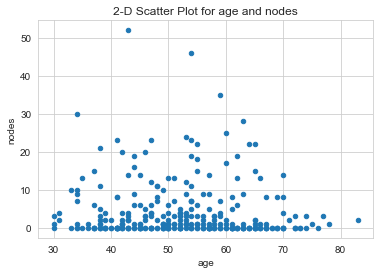

In [76]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.title('2-D Scatter Plot for age and nodes')
plt.show()


## --> Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.


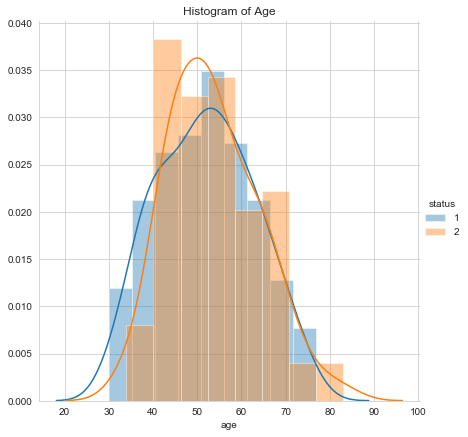

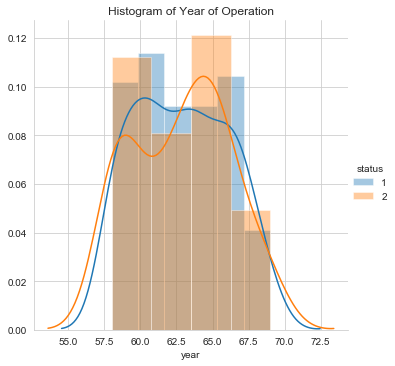

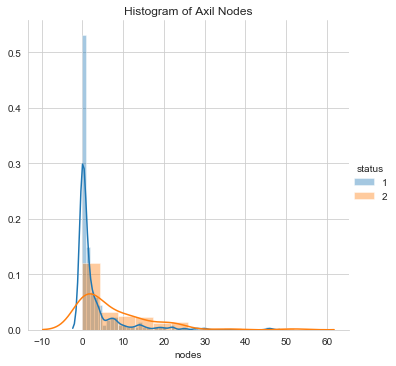

In [77]:
#Univaraite analysis
#Histogram with pdf
#pdf(smoothed form of histogram)


sns.FacetGrid(haberman,hue="status",size=6)\
   .map(sns.distplot,"age")\
   .add_legend();
plt.title("Histogram of Age")

sns.FacetGrid(haberman,hue="status",size=5)\
   .map(sns.distplot,"year")\
   .add_legend();
plt.title("Histogram of Year of Operation")

sns.FacetGrid(haberman,hue="status",size=5)\
   .map(sns.distplot,"nodes")\
   .add_legend();
plt.title("Histogram of Axil Nodes")
plt.show()

Obervations: 

From : Histogram of Age
1. In this Histogram the Status points are overlapping.
2. We can see from this histogram the paitents who has age between 40 to 60 were not survive.
3. Patients Age of 30 to 40 are more likely to survive.

From : Histogram of Year of Operation

1. This plot represents the immense overlapping of respective two classes.
2. We can clearly see from the histogram paitents whose operation was done in year between 1960 to 1966 died. 

From : Histogram of nodes

1. We can say probabily 58% people survived who had 0-5 nodes and 12% died as well.



#### Univariate Analysis using CDF(Cummulative Distributed Function)

In [78]:
haberman_Survive = haberman.loc[haberman["status"] == 1];
haberman_NotSurvive = haberman.loc[haberman["status"] == 2];


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


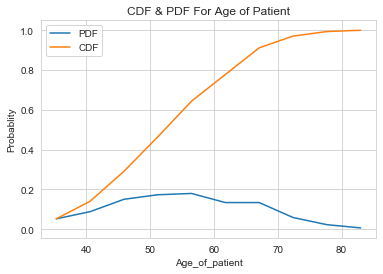

In [79]:
# CDF For Age of Patient Feature with haberman Survival Analysis 

counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF & PDF For Age of Patient')
plt.legend(['PDF', 'CDF'])
plt.xlabel("Age_of_patient")
plt.ylabel("Probablity")
plt.show()



[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


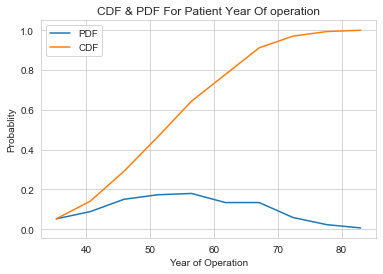

In [80]:
# CDF For Patient Year Of operation Feature with haberman Survival Analysis:

counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF & PDF For Patient Year Of operation')
plt.legend(['PDF', 'CDF'])
plt.xlabel("Year of Operation")
plt.ylabel("Probablity")
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


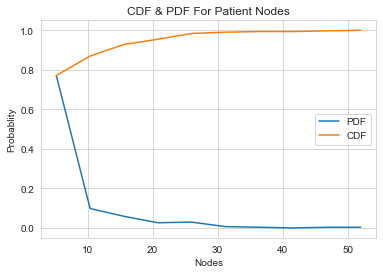

In [81]:
# CDF For Patient Nodes Feature with haberman Survival Analysis:


counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF & PDF For Patient Nodes')
plt.legend(['PDF', 'CDF'])
plt.xlabel("Nodes")
plt.ylabel("Probablity")
plt.show()

Observation:

From : CDF For Age of Patient Feature with haberman Survival Analysis 

1. 5% of the patient survived 5 years or longer whose Age <= 32 years .
2. There are 80% of the patient survived 5 years or longer that have Age <= 63
3. There are 100% of the patient survived 5 years or longer that have Age <= 78

From : CDF For Year of Operation of Patient Feature with haberman Survival Analysis 

1. There are 20% of patient survived 5 years or longer whose year of operation is <=1957
2. 100% of probability patient survived 5 years or longer whose year of operation is <=1969 may be due to advance medical technology

From : CDF For Nodes of Patient Feature with haberman Survival Analysis 

1. There are 82% probability patient survived 5 years or longer whose positive axillary nodes <= 4
2. There are 100% probability patient survived 5 years or longer whose positive axillary nodes <= 30

### Boxplot, Voilin plots

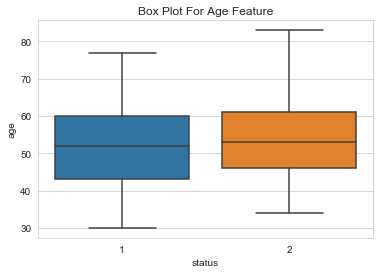

In [83]:
#Box Plot For Age Feature Analysis :-
sns.boxplot(x="status",y="age",data=haberman)
plt.title('Box Plot For Age Feature')
plt.show()

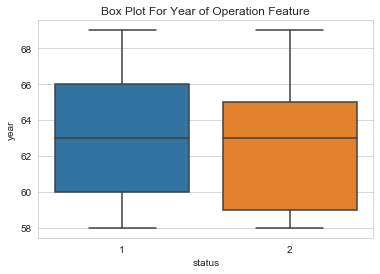

In [84]:
#Box Plot For Year of Operation Feature Analysis 
sns.boxplot(x="status",y="year",data=haberman)
plt.title('Box Plot For Year of Operation Feature')
plt.show()

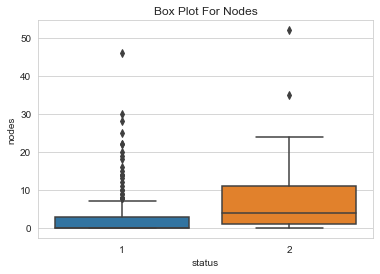

In [85]:
#Box Plot For Nodes Feature Analysis 
sns.boxplot(x="status",y="nodes",data=haberman)
plt.title('Box Plot For Nodes')
plt.show()

##### Violin Plot

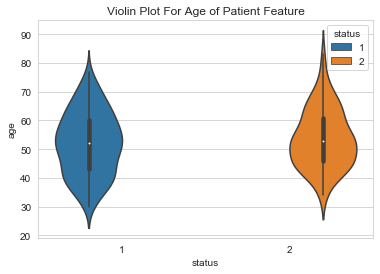

In [87]:
# Violin Plot For Age of Patient Feature Analysis
sns.violinplot(x="status",y="age",data=haberman,hue="status")
plt.title('Violin Plot For Age of Patient Feature')
plt.show()

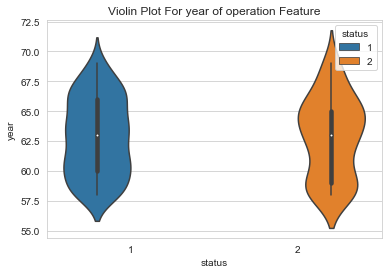

In [88]:
# Violin Plot For year of operation Feature Analysis
sns.violinplot(x="status",y="year",data=haberman,hue="status")
plt.title('Violin Plot For year of operation Feature')
plt.show()

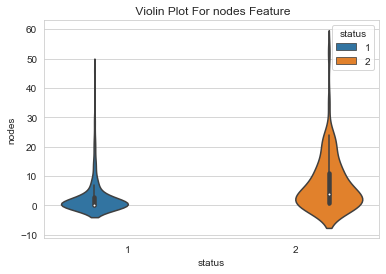

In [89]:
# Violin Plot For nodes Feature Analysis
sns.violinplot(x="status",y="nodes",data=haberman,hue="status")
plt.title(' Violin Plot For nodes Feature')
plt.show()

Observation : 
1. There are massive overlap for all features
2. Most of the Points on the patient survived 5 years or longer lies Nodes value <=7.


## Bivariate Analysis  (scatter plots, pair-plots) 

Scatter plots

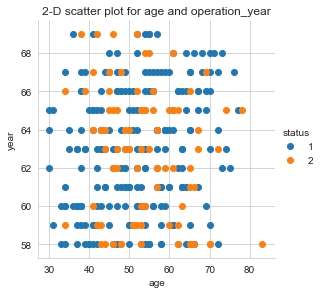

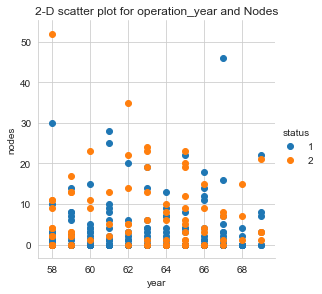

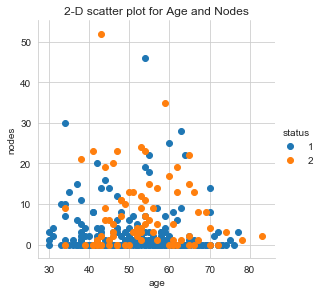

In [90]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("2-D scatter plot for age and operation_year")
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("2-D scatter plot for operation_year and Nodes")
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D scatter plot for Age and Nodes")
plt.show();

Observation:

1. In this 2-D Scatter plot we can see the status points are overlapping so the classifiaction between both is difficult.
2. From Nodes There are more chances of the patient died within 5 year whose age is 40 to 50 and 60 to 70.


## Pair Plot 

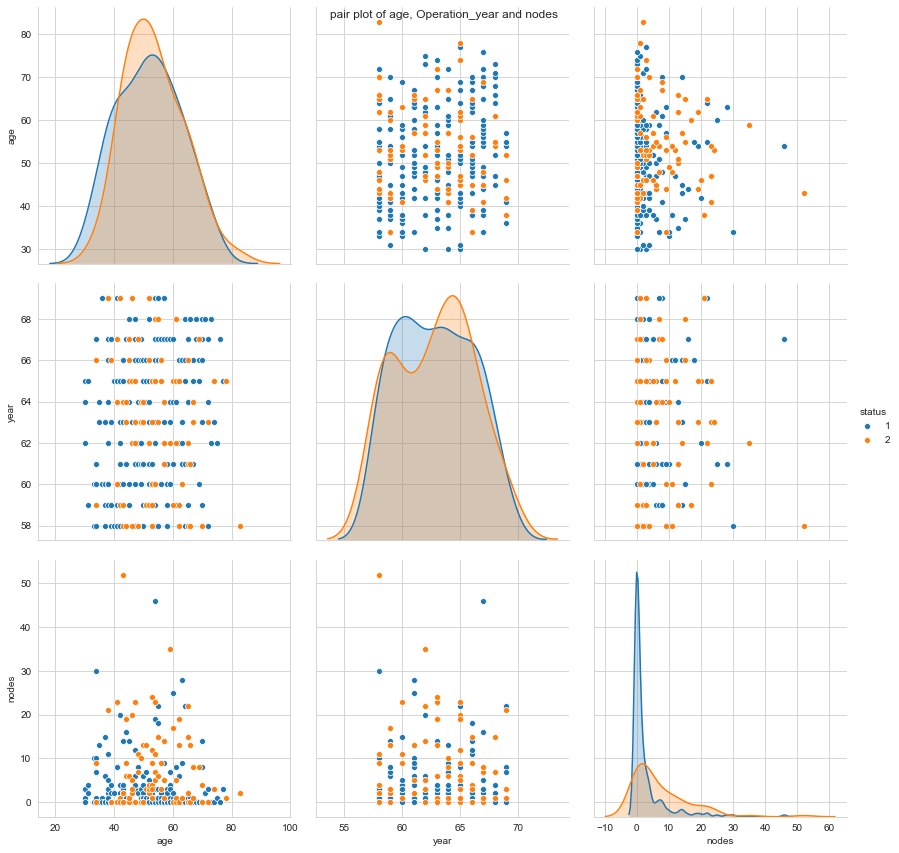

In [91]:
haberman.loc[:]
sns.pairplot(haberman,hue="status",size=4, vars= ['age','year','nodes'])
plt.suptitle("pair plot of age, Operation_year and nodes")
plt.show()

Observation: 
1. Here we cannot classify between any feature without having error. 
2. We can somehow classify between the positive axilary value with the age of patient with having some error
3. There are more probability of the patient survived 5 years or longer whose auxilary value is <=4